1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [15]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

p = 1-st.poisson.cdf(15, 6.3)
print("Probability = ", p)

p_relevant = st.norm.cdf(-3) + (1. - st.norm.cdf(3))
print("\nSignificant probability derived from normal distribution with Z=3: ", p_relevant)

if p<p_relevant:
    print("\nThe probability is not relevant.") 

Probability =  0.0008444930803583883

Significant probability derived from normal distribution with Z=3:  0.0026997960632601965

The probability is not relevant.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [22]:
#Define the values needed
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = sqrt(np.var(pre, ddof=1))
sigma2 = sqrt(np.var(post, ddof=1))

mean1 = np.mean(pre)
mean2 = np.mean(post)

n = len(pre)

#Compute T value
sigma = sqrt((sigma1**2 + sigma2**2)/2)
T = (mean1 - mean2)/(sigma * sqrt(2/n))
print("T =", T)

#Compute the p-value
pvalue = st.t.cdf(T, n - 1) + (1. - st.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("\nThe probability that the two samples are taken from the same distribution is meaningfully low."
      "\nThus, we can assume that the change in blood pressure is statistically significant.")

T = -3.786997938137629
p-value = 0.004302464132864604

The probability that the two samples are taken from the same distribution is meaningfully low.
Thus, we can assume that the change in blood pressure is statistically significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Hares peak frequency: 0.09523809523809523 
Lynxes peak frequency: 0.09523809523809523

Hares population period: 10.5 
Lynxes population period: 10.5


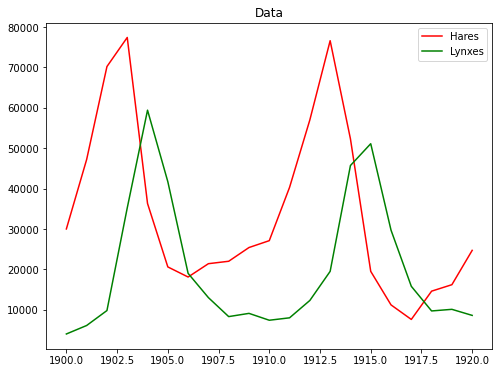

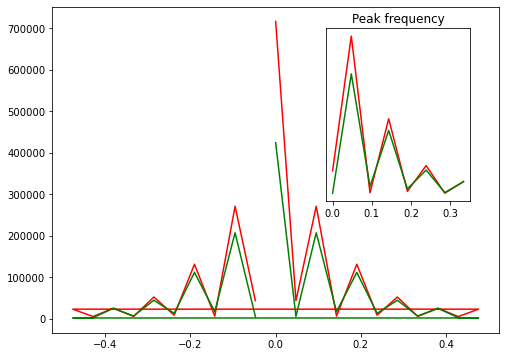

In [19]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt 

# Read and plot the data 
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T
plt.figure(figsize=(8,6))
plt.plot(year, hares, color='r', label='Hares')
plt.plot(year, lynxes, color='g', label='Lynxes')
plt.title('Data')
plt.legend(loc='best')

# Perform FFT
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)

power_hares = np.abs(hares_fft)
power_lynxes = np.abs(lynxes_fft)

sample_freq = fftpack.fftfreq(hares.size, d=1)

# Plot the Fourier Transform
plt.figure(figsize=(8,6))
plt.plot(sample_freq,power_hares, color='r')
plt.plot(sample_freq,power_lynxes, color='g')

# Compute the peak frequency
pos_mask = np.where(sample_freq > 0)
pos_freq = sample_freq[pos_mask]
power_hares = power_hares[pos_mask]
power_lynxes = power_lynxes[pos_mask]

peak_hares = pos_freq[power_hares.argmax()]
peak_lynxes = pos_freq[power_lynxes.argmax()]

axes = plt.axes([0.6, 0.43, 0.25, 0.4])
plt.title('Peak frequency')
plt.plot(sample_freq[:8], power_hares[:8], color='r')
plt.plot(sample_freq[:8], power_lynxes[:8], color='g')
plt.setp(axes, yticks=[])

print("Hares peak frequency:", peak_hares, "\nLynxes peak frequency:", peak_lynxes)

print("\nHares population period:", 1/peak_hares, "\nLynxes population period:", 1/peak_lynxes)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image - Method 2')

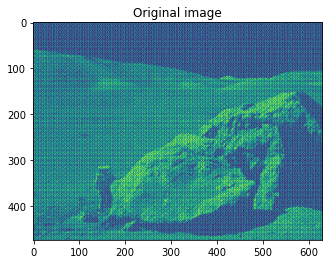

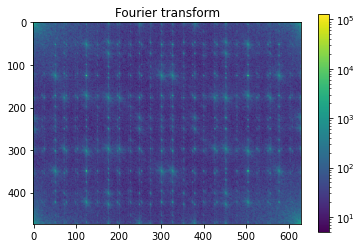

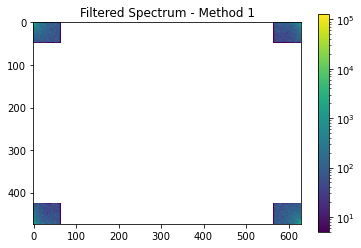

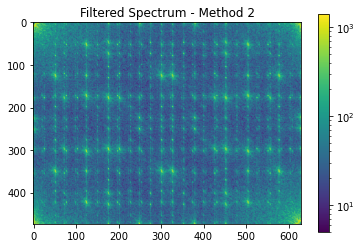

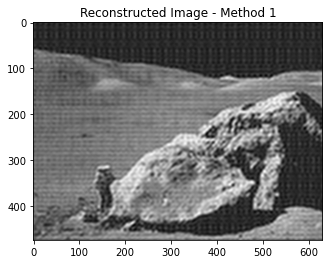

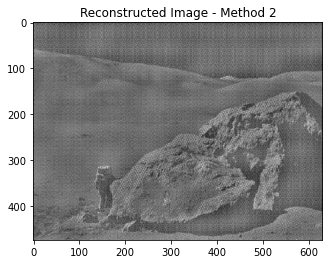

In [45]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# APPLY FFT
img = plt.imread("data/moonlanding.png")
original = plt.figure()
plt.imshow(img)
plt.title('Original image')
img_fft = fftpack.fft2(img)

# PLOT THE FFT RESULTING IMAGE
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
fft_fig = plt.figure()
plot_spectrum(img_fft)
plt.title('Fourier transform')

# IMAGE DENOISING
img_fft1 = img_fft.copy()
r, c = img_fft.shape


# Method1: keeping only corners of the fft
keep_fraction = 0.1
img_fft1[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_fft1[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

cleaned1 = plt.figure()
plot_spectrum(img_fft1)
plt.title('Filtered Spectrum - Method 1')

#Method2: removing highest values in the fft (blurring)
img_fft2 = img_fft.copy()
for i in range(r):
    for j in range(c):
        if (np.abs(img_fft2[i, j]) > 1400):
            img_fft2[i, j] = 0.05

cleaned2 = plt.figure()
plot_spectrum(img_fft2)
plt.title('Filtered Spectrum - Method 2')

# RECONSTRUCT THE IMAGES
im_new1 = fftpack.ifft2(img_fft1).real
result1 = plt.figure()
plt.imshow(im_new1, plt.cm.gray)
plt.title('Reconstructed Image - Method 1')

im_new2 = fftpack.ifft2(img_fft2).real
result2 = plt.figure()
plt.imshow(im_new2, plt.cm.gray)
plt.title('Reconstructed Image - Method 2')